<a href="https://colab.research.google.com/github/porkens/myTestRepo/blob/main/Bartlomiej_Noga_Praca_domowa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


**Simple visualization and classification of the digits dataset**
=============================================================

Do a simple MLP classification of 28x28 MNIST dataset

*Marcin Wolter*



In [ ]:
#import packages and load datasets

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.


# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, train_size=0.5)

print("Image shape: ",X_train.shape)
# dimension of face image




Image shape:  (35000, 784)


Plot the data: images of digits
-------------------------------

Each data in a 28x28 image

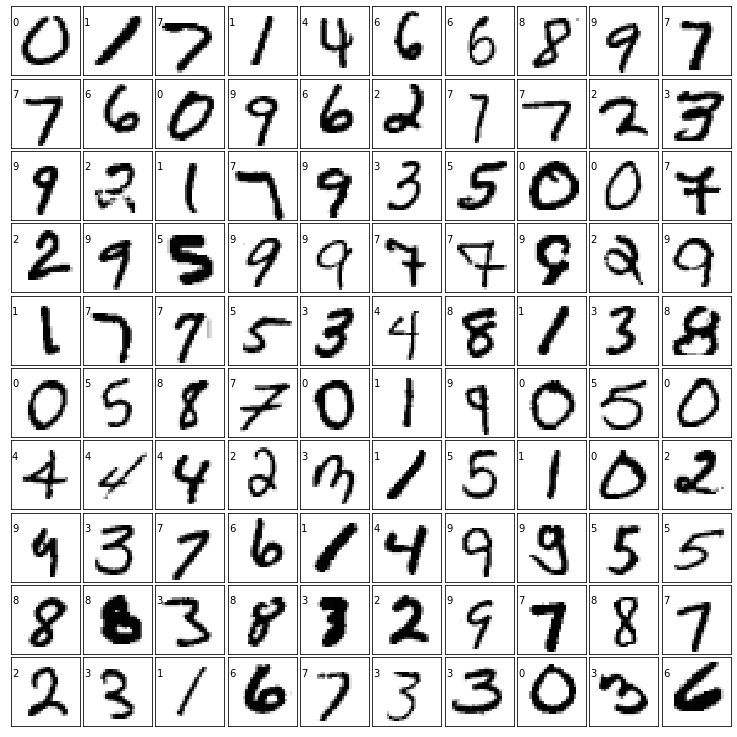

In [ ]:
# leave empty for time beeing

## **Classify with MLP**

In [ ]:

# tu musimy zdefiniować klasyfikator, wytrenowaći sprawdzić "score" dla 
# danych testowych
#Proponowane parametry sieci: ukryte warstwy [100,100],solver adam, verbose=10 

from matplotlib import pyplot as plt


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', alpha=0.001, 
                    learning_rate_init=0.001, early_stopping=True,validation_fraction=0.2,solver='adam',verbose=10,n_iter_no_change=100,max_iter=1000)
                    #max_iter=1000) 


print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = 0.58072381
Validation score: 0.920429
Iteration 2, loss = 0.22472208
Validation score: 0.935714
Iteration 3, loss = 0.16439557
Validation score: 0.947429
Iteration 4, loss = 0.13005289
Validation score: 0.952143
Iteration 5, loss = 0.10487254
Validation score: 0.957143
Iteration 6, loss = 0.09106513
Validation score: 0.953857
Iteration 7, loss = 0.07222982
Validation score: 0.957286
Iteration 8, loss = 0.06147609
Validation score: 0.962429
Iteration 9, loss = 0.05019701
Validation score: 0.958286
Iteration 10, loss = 0.04296633
Validation score: 0.963000
Iteration 11, loss = 0.03758393
Validation score: 0.964571
Iteration 12, loss = 0.03219373
Validation score: 0.964000
Iteration 13, loss = 0.02676514
Validation score: 0.963714
Iteration 14, loss = 0.02186434
Validation score: 0.965143
Iteration 15, loss = 0.01914151
Validation score: 0.966000
Iteration 16, loss = 0.01591827
Validation score: 0.965000
Iteration 17, loss = 0.01267687
Validation score: 0.965857
Iterat

# **Plot loss**
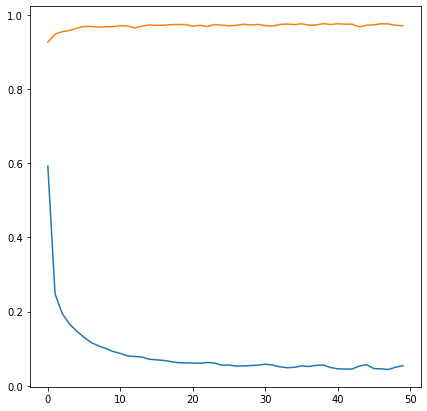

In [ ]:
# tu rysujemy loss i validation score
# zostawiamy na razie puste

#**Plot results**
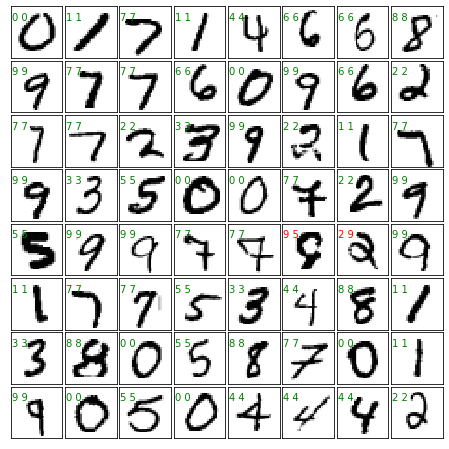

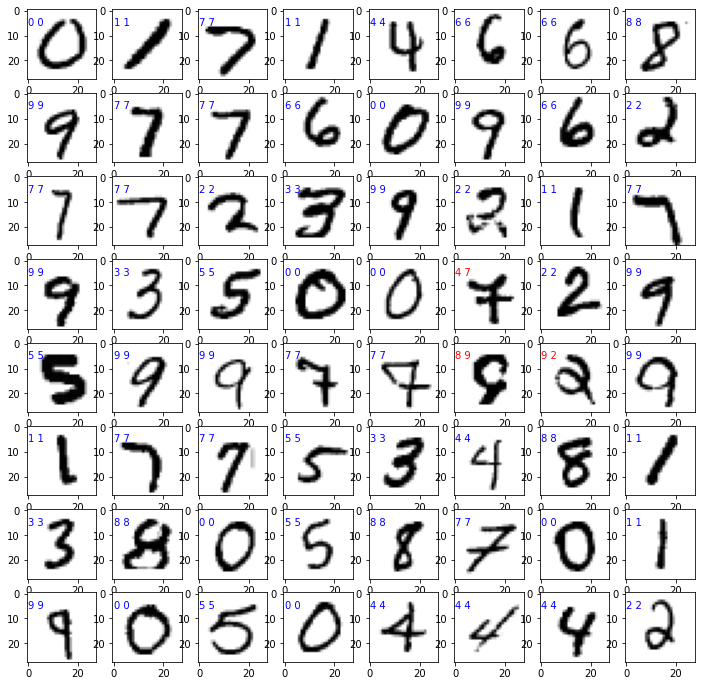

In [ ]:
# Plot the prediction
fig = plt.figure(figsize=(12, 12))
predicted = clf.predict(X_test)

for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1)
  ax.imshow(X_test[i].reshape(28,28),cmap=plt.cm.binary)
  if y_test[i]== predicted[i]:
    ax.text(0,6,predicted[i] + ' ' + y_test[i], color='blue')
  else:
    ax.text(0,6,predicted[i] + ' ' + y_test[i], color='red')
# Tu rysujemy cyfry z wynikami
# na razie zostawiamy puste

Print the classification report



In [ ]:
#from sklearn import metrics
#print(metrics.classification_report(expected, predicted))

# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [ ]:
#print(metrics.confusion_matrix(expected, predicted))



# **Repeat the same classification for faces**

In [ ]:

####################################################
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


Plot the data: images of faces
-------------------------------

Each data in a 32x24 image

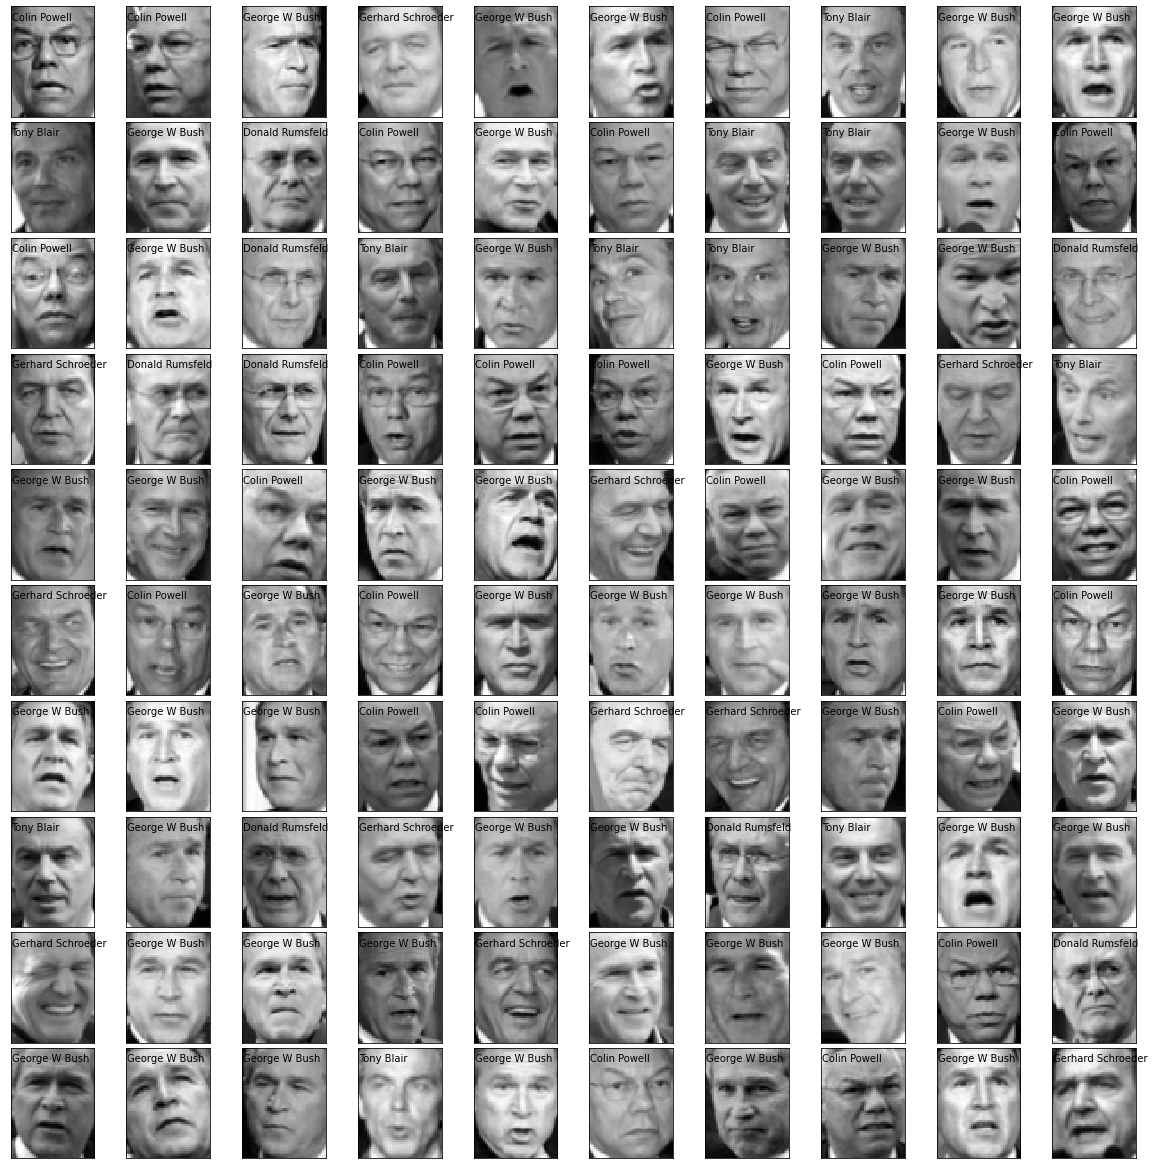

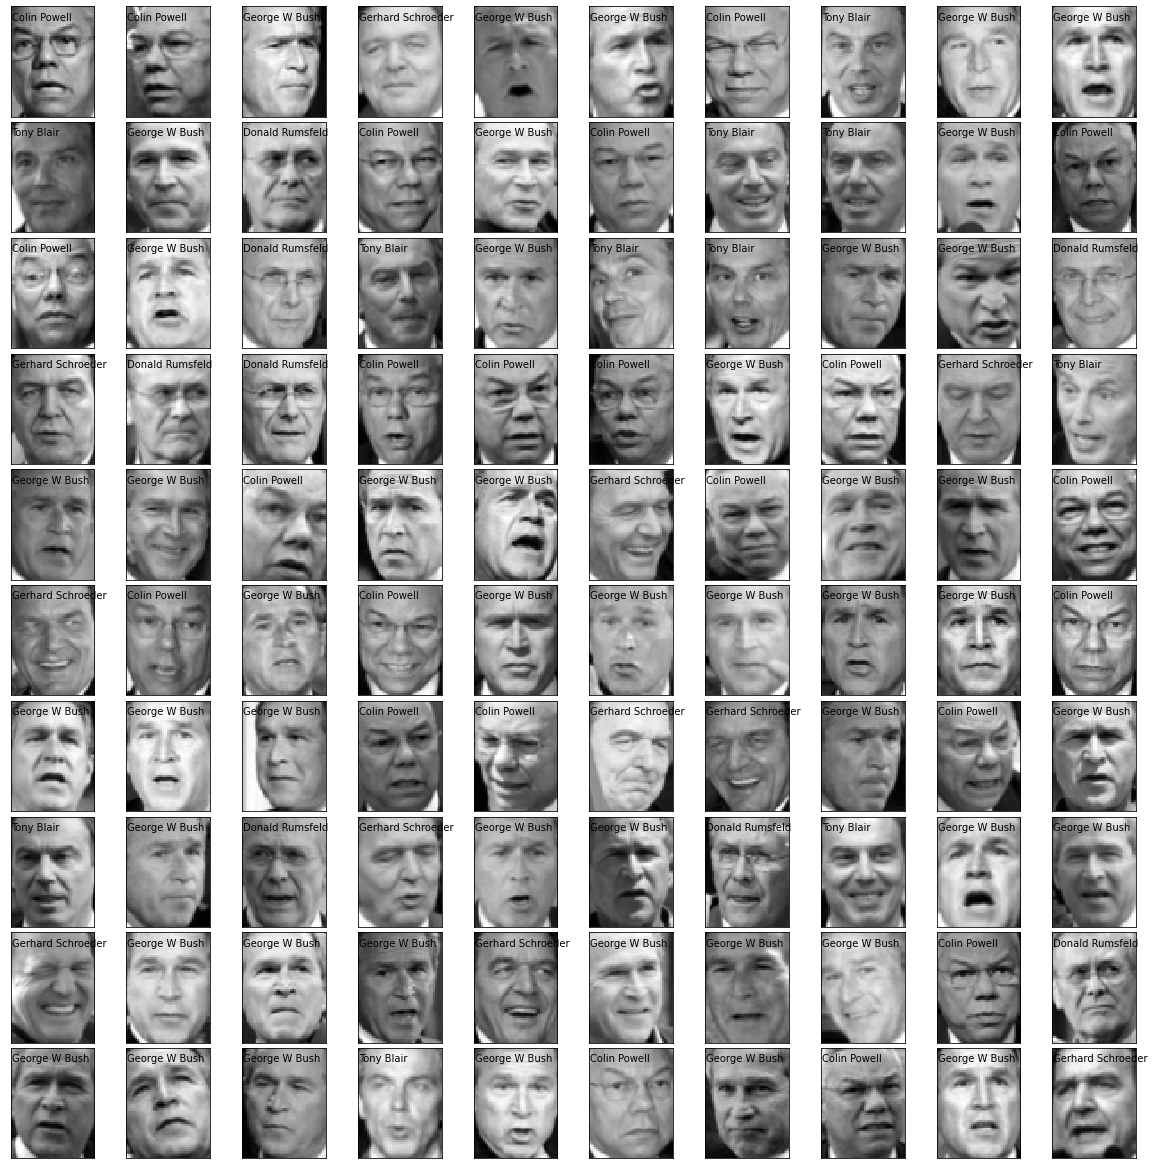

In [ ]:
# tu rysujemy twarze
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(target_names[y_test[i]]))

## **Classify with MLP**

In [ ]:

# train the model
clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', alpha=1,
                    learning_rate_init=0.001, early_stopping=True,validation_fraction=0.2,solver='adam',verbose=10,n_iter_no_change=90,max_iter=1000)
                    #max_iter=1000) 


print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)




Iteration 1, loss = inf
Validation score: 0.093567
Iteration 2, loss = inf
Validation score: 0.222222
Iteration 3, loss = inf
Validation score: 0.093567
Iteration 4, loss = inf
Validation score: 0.479532
Iteration 5, loss = 120.17018192
Validation score: 0.222222
Iteration 6, loss = 81.55865280
Validation score: 0.362573
Iteration 7, loss = 29.64137990
Validation score: 0.216374
Iteration 8, loss = 39.59429268
Validation score: 0.251462
Iteration 9, loss = 24.17733030
Validation score: 0.549708
Iteration 10, loss = 25.25885963
Validation score: 0.368421
Iteration 11, loss = 22.03242226
Validation score: 0.467836
Iteration 12, loss = 15.51489861
Validation score: 0.485380
Iteration 13, loss = 16.59722080
Validation score: 0.280702
Iteration 14, loss = 25.32040648
Validation score: 0.421053
Iteration 15, loss = 30.94488718
Validation score: 0.578947
Iteration 16, loss = 23.59731231
Validation score: 0.403509
Iteration 17, loss = 33.46823169
Validation score: 0.584795
Iteration 18, loss =

# **Plot loss**

[0.0935672514619883, 0.2222222222222222, 0.0935672514619883, 0.47953216374269003, 0.2222222222222222, 0.36257309941520466, 0.21637426900584794, 0.25146198830409355, 0.5497076023391813, 0.3684210526315789, 0.4678362573099415, 0.4853801169590643, 0.2807017543859649, 0.42105263157894735, 0.5789473684210527, 0.40350877192982454, 0.5847953216374269, 0.5847953216374269, 0.5146198830409356, 0.5497076023391813, 0.6432748538011696, 0.42105263157894735, 0.6432748538011696, 0.5029239766081871, 0.6081871345029239, 0.6432748538011696, 0.6023391812865497, 0.543859649122807, 0.6081871345029239, 0.4619883040935672, 0.6549707602339181, 0.5906432748538012, 0.7017543859649122, 0.7309941520467836, 0.7076023391812866, 0.47368421052631576, 0.5029239766081871, 0.7134502923976608, 0.5146198830409356, 0.6140350877192983, 0.5730994152046783, 0.4269005847953216, 0.6842105263157895, 0.5321637426900585, 0.631578947368421, 0.6608187134502924, 0.7602339181286549, 0.695906432748538, 0.6608187134502924, 0.666666666666

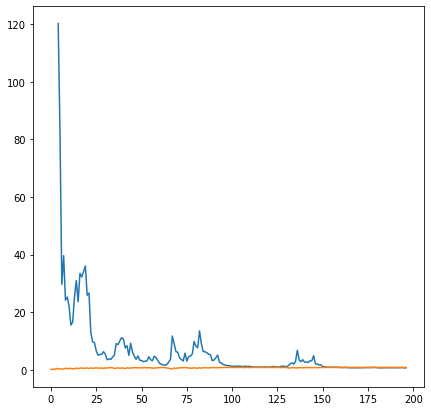

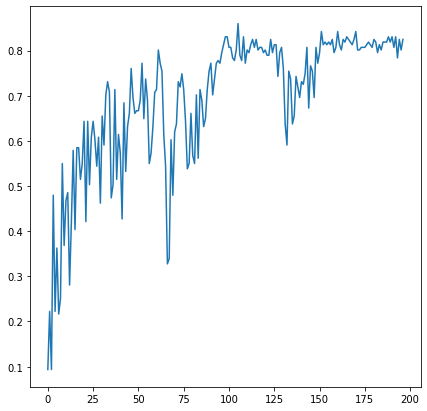

In [ ]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()
fig=plt.figure(figsize=(7,7))

#plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True

plt.plot(np.asarray(clf.validation_scores_))

plt.show()

# **Plot results**


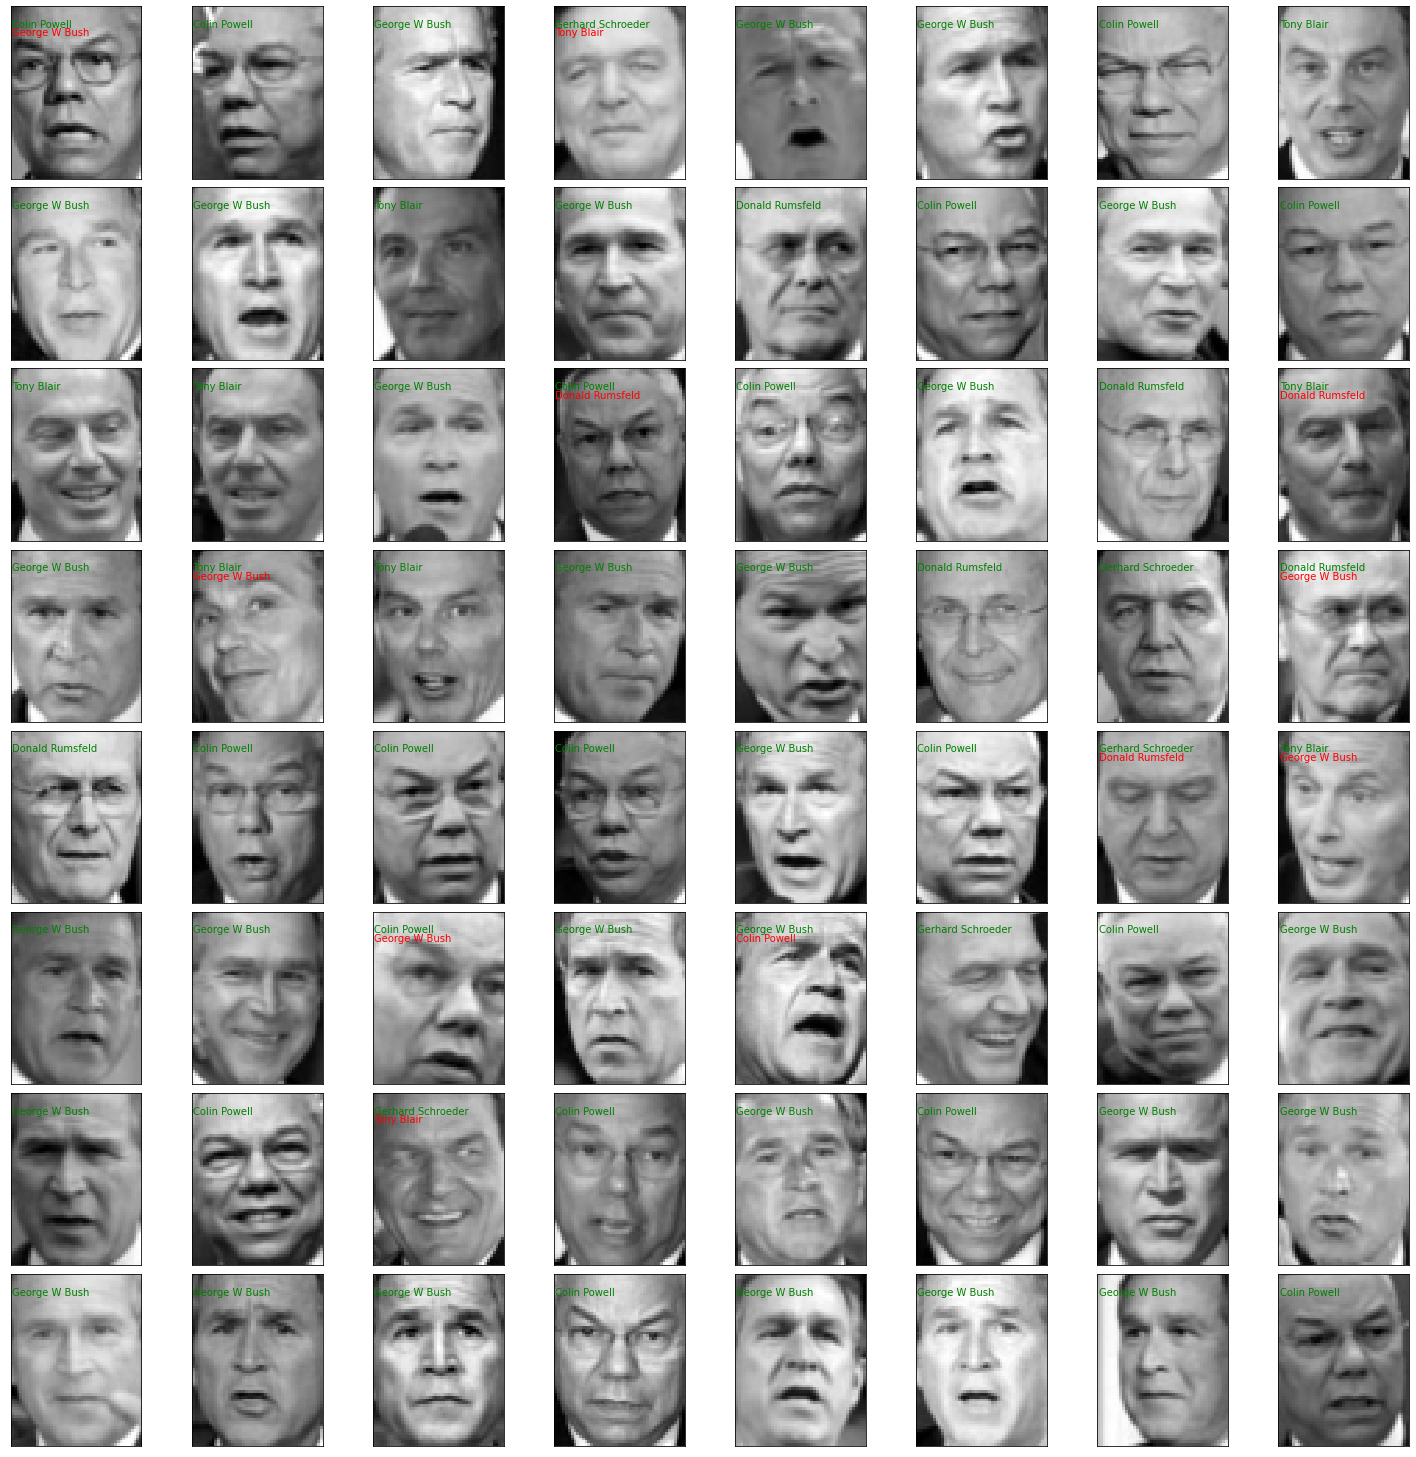

In [ ]:
# Plot the prediction
predicted = clf.predict(X_test)
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(24, 24)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  if y_test[i]== predicted[i]:
    ax.text(0, 7, str(target_names[y_test[i]]) + str(target_names[predicted[i]]),color='blue') 
  else:
    ax.text(0, 7, str(target_names[y_test[i]]) + str(target_names[predicted[i]]),color='red')





NameError: ignored

Print the classification report



In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.73      0.82        64
           1       0.66      0.72      0.69        32
           2       0.85      0.89      0.87       127
           3       0.82      0.79      0.81        29
           4       0.71      0.82      0.76        33

    accuracy                           0.82       285
   macro avg       0.79      0.79      0.79       285
weighted avg       0.83      0.82      0.82       285



# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [ ]:
print(metrics.confusion_matrix(y_test, predicted))



[[ 47   4   8   1   4]
 [  0  23   5   0   4]
 [  4   7 113   3   0]
 [  0   0   3  23   3]
 [  0   1   4   1  27]]
